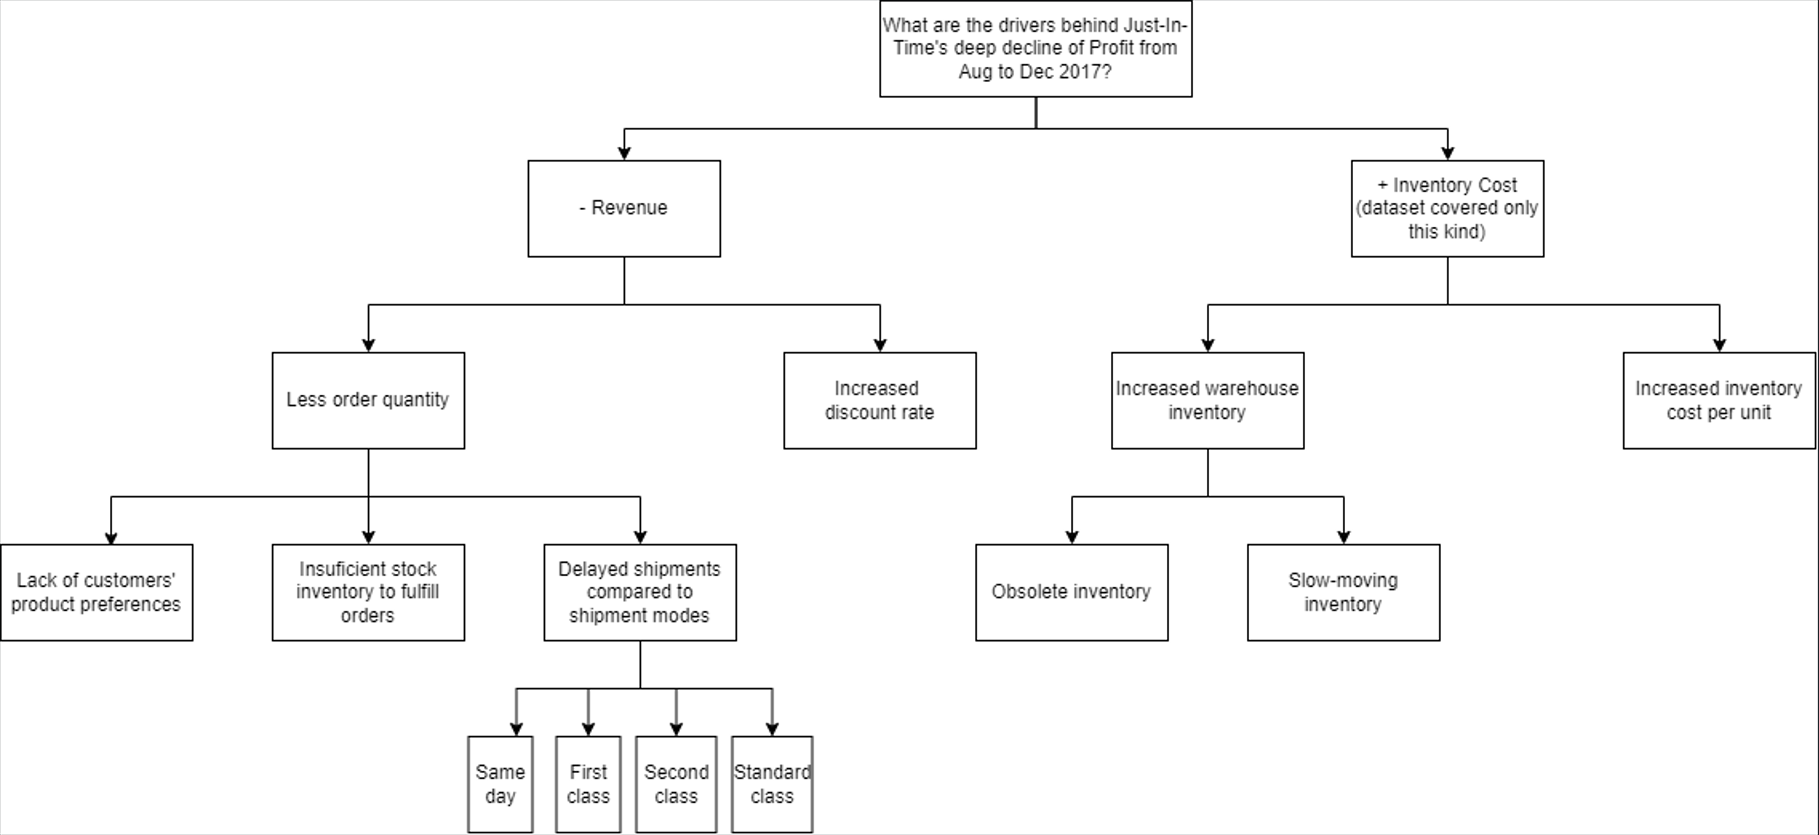

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
df = pd.read_csv("Supplychain2015to2017_cleaned.csv")
df

,orderid,orderitemid,ordertime,orderqty,productname,dept,category,fulfillmentdays,whinv,invcostperunit,...,custmarket,custregion,custcountry,whcountry,shiptime,modename,shipschedule,grosssales,discpc,profit
0,1758,4381,2015-01-01,1,Pelican Sunstream 100 Kayak,Fan Shop,Water Sports,1.8,132,2.03202,...,LATAM,Central America,Nicaragua,USA,2015-01-06,Same Day,3,200,0.09,100
1,11,32,2015-01-01,4,Nike Men's Free 5.0+ Running Shoe,Footwear,Cardio Equipment,9.4,18,2.25689,...,LATAM,South America,Brazil,Puerto Rico,2015-01-03,Standard Class,4,400,0.06,245
2,11,33,2015-01-01,5,O'Brien Men's Neoprene Life Vest,Fan Shop,Indoor/Outdoor Games,5.5,442,2.34227,...,LATAM,South America,Brazil,Puerto Rico,2017-09-05,Standard Class,4,250,0.09,125
3,43961,109801,2015-01-01,5,Under Armour Women's Ignite Slide,Footwear,Electronics,2.9,18,2.23827,...,Europe,Eastern Europe,Belarus,USA,2015-01-05,Standard Class,4,160,0.15,75
4,15,44,2015-01-01,1,Pelican Sunstream 100 Kayak,Fan Shop,Water Sports,1.8,132,2.03202,...,LATAM,South America,Brazil,USA,2015-01-07,Standard Class,4,200,0.18,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21452,75673,178988,2017-12-28,1,Adult dog supplies,Pet Shop,Pet Supplies,6.9,2,2.07928,...,Pacific Asia,Eastern Asia,China,USA,2017-12-29,Standard Class,4,84,0.07,40
21453,75263,178578,2017-12-29,1,First aid kit,Health and Beauty,Health and Beauty,2.3,18,0.18893,...,Pacific Asia,South Asia,India,USA,2017-12-30,Standard Class,4,293,0.15,136
21454,73878,177193,2017-12-29,1,Summer dresses,Apparel,Women's Clothing,6.9,13,1.36250,...,Pacific Asia,Southeast Asia,Malaysia,USA,2017-12-30,Standard Class,4,216,0.04,99
21455,75388,178703,2017-12-30,1,Rock music,Discs Shop,Music,9.3,16,2.26272,...,Pacific Asia,South Asia,India,USA,2017-12-30,Standard Class,4,261,0.07,110


In [193]:
df.dtypes

orderid              int64
orderitemid          int64
ordertime           object
orderqty             int64
productname         object
dept                object
category            object
fulfillmentdays    float64
whinv                int64
invcostperunit     float64
custid               int64
custmarket          object
custregion          object
custcountry         object
whcountry           object
shiptime            object
modename            object
shipschedule         int64
grosssales           int64
discpc             float64
profit               int64
dtype: object

In [195]:
inv = pd.read_csv("inventory.csv")
inv

,productname,year,month,whinv,invcostperunit
0,Perfect Fitness Perfect Rip Deck,2017,12,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,2017,12,2,1.29291
2,O'Brien Men's Neoprene Life Vest,2017,12,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,2017,12,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017,12,0,1.47648
...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015,1,0,1.44662
4196,Ogio Race Golf Shoes,2015,1,0,0.10310
4197,GolfBuddy VT3 GPS Watch,2015,1,0,1.77747
4198,Titleist Small Wheeled Travel Cover,2015,1,0,0.15244


## **H1:** Customers change their product preferences, leading to less orders being made. ##

### 1.1. Order Situation ###

In [281]:
#Setup
df["shipdate"] = df["shiptime"].astype("datetime64[ns]")
df["orderdate"] = df["ordertime"].astype("datetime64[ns]")
df["ordermonth"] = df["ordertime"].dt.month
df["orderyear"] = df["ordertime"].dt.year

df_sumqty = df.groupby(["orderyear","ordermonth"])["orderqty"].sum()
df_countord = df.groupby(["orderyear","ordermonth"])["orderid"].count()

In [283]:
#Order Summary
df_sumqty_year = df.groupby("orderyear")["orderqty"].sum()
df_countord_year = df.groupby("orderyear")["orderid"].count()

df_ordsum = pd.merge(df_countord_year, df_sumqty_year, left_on = "orderyear", right_on = "orderyear", how = "left")
df_ordsum["avgqty"] = df_ordsum["orderqty"]/df_ordsum["orderid"]

df_ordsum


,orderid,orderqty,avgqty
orderyear,,,
2015,7597,18186,2.393840
2016,7651,18138,2.370671
2017,6209,13155,2.118699


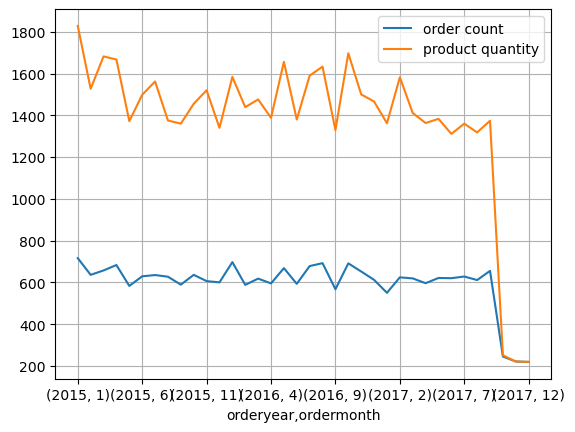

In [87]:
#Order trend
df_countord.plot( y = "orderid", kind = "line", grid = True, label = "order count")
df_sumqty.plot(y = "orderqty", kind = "line", grid = True, label = "product quantity")

plt.legend()
plt.show()

**Comment**: There is a sharp decrease of around 1,200 orders (82%) from Sep to Oct 2017, and maintain at around 250 monthly orders for the rest of the period.

### 1.2. Product Preferences ###

In [215]:
df_septodec2017 = df[(df["orderyear"] == 2017) & (df["ordermonth"] >= 9)]
inv_septodec2017 = inv[(inv["year"] == 2017) & (inv["month"] >= 9)]

df_product_septodec2017 = df_septodec2017.groupby("productname")["orderqty"].sum().reset_index()
inv_product_septodec2017 = inv_septodec2017.groupby("productname")["whinv"].sum().reset_index()
dfinv_product_septodec2017 = pd.merge(df_product_septodec2017, inv_septodec2017, left_on = "productname", right_on = "productname", how = "left")

septodec2017 = dfinv_product_septodec2017.groupby("productname")[["orderqty","whinv"]].sum().rename(columns = {"orderqty" : "nextqty", "whinv" : "nextinv"})

In [217]:
df_maytoaug2017 = df[(df["orderyear"] == 2017) & (df["ordermonth"] >= 5) & (df["ordermonth"] <= 8)]
inv_maytoaug2017 = inv[(inv["year"] == 2017) & (inv["month"] >= 5) & (inv["month"] <= 8)]

df_product_maytoaug2017 = df_maytoaug2017.groupby("productname")["orderqty"].sum().reset_index()
inv_product_maytoaug2017 = inv_maytoaug2017.groupby("productname")["whinv"].sum().reset_index()
dfinv_product_maytoaug2017 = pd.merge(df_product_maytoaug2017, inv_maytoaug2017, left_on = "productname", right_on = "productname", how = "left")

                              
maytoaug2017 = dfinv_product_maytoaug2017.groupby("productname")[["orderqty","whinv"]].sum().rename(columns = {"orderqty" : "preqty", "whinv" : "preinv"})

In [239]:
maytodec2017 = pd.merge(maytoaug2017, septodec2017, left_on = "productname", right_on = "productname", how = "left")
maytodec2017["invbal"] = maytodec2017["nextinv"] - maytodec2017["preinv"]
maytodec2017["qtybal"] = maytodec2017["nextqty"] - maytodec2017["preqty"]
maytodec2017[(maytodec2017["invbal"] > 0) & (maytodec2017["qtybal"] <= 0)].sort_values("preqty", ascending = False)

,preqty,preinv,nextqty,nextinv,invbal,qtybal
productname,,,,,,
Garmin Approach S3 Golf GPS Watch,24,4,12.0,6.0,2.0,-12.0
Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,20,5,16.0,6.0,1.0,-4.0
Mio ALPHA Heart Rate Monitor/Sport Watch,16,0,16.0,3.0,3.0,0.0
Nike Men's Deutschland Weltmeister Winners Bl,16,4,12.0,5.0,1.0,-4.0
TaylorMade Women's RBZ SL Rescue,16,3,8.0,4.0,1.0,-8.0


**Comment**: 
* These are 5 products that are not of customer preferences. Despite slight increase of inventory for each of 5 above products, there are less or no change of orders being made for those. 
* However, the order quantity of these products are two low to demonstrate that customers have changed their overall preferences.

=> Therefore, the (H1) hypothesis that company does not respond quickly to change in customers' preference ***is rejected.***

## **H2:** The more delayed the shipments in regard of delivery modes, the lesser the number of orders ##

### 2.1. Introduction to Shipment mode ###

In [267]:
df.groupby("modename")["shipschedule"].mean().reset_index()

,modename,shipschedule
0,First Class,1.0
1,Same Day,3.0
2,Second Class,2.0
3,Standard Class,4.0


### 2.2. Late Shipment Situation ####

In [302]:
#Overall on-time shipment percentage
df['OFCT'] = (df['shipdate'] - df['orderdate']) / np.timedelta64(1, 'D')

df["OTSP"] = df["shipschedule"] - df["OFCT"]
on_time_shipping = df[df["OTSP"] >= 0]

on_time_shipping_pct = on_time_shipping["OTSP"].count() / df["OTSP"].count()*100
print("The Overall On-Time Shipping Percentage From 2015 - 2017 is:",on_time_shipping_pct,"%")

The Overall On-Time Shipping Percentage From 2015 - 2017 is: 53.04562613599292 %


In [324]:
mod_full = df.groupby("modename")["OTSP"].count()
mod_real = on_time_shipping.groupby("modename")["OTSP"].count()
mod_joined = pd.merge(mod_full, mod_real,left_on='modename', right_on='modename', how='left')
mod_joined["on_time_shipping_pct"] = mod_joined["OTSP_y"]/ mod_joined["OTSP_x"]*100

OTSP_rate = mod_joined.rename(columns={"OTSP_x": "Total shipment", "OTSP_y": "Late shipment", "on_time_shipping_pct": "OTSP percentage(%)"})
OTSP_rate

,Total shipment,Late shipment,OTSP percentage(%)
modename,,,
First Class,3420,81,2.368421
Same Day,1372,1065,77.623907
Second Class,4228,1609,38.055818
Standard Class,12437,8627,69.365603


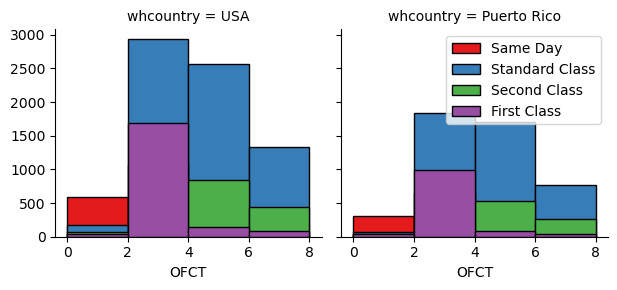

In [300]:
#distribution of shipment time by warehouse country and ship mode
bins=np.arange(0, 10, 2)
g = sns.FacetGrid(df, col="whcountry", hue="modename", palette="Set1", col_wrap=4)
g.map(plt.hist, 'OFCT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

**Comment:**
* Nearly half of order quantity is being delivered late compared to the shipment scheduled days. Specifically, first-class shipment mode, where the fees are the largest and high-profile customers usually employ, accounts for the lowest on-time shipment rate (2%), following with second class at 38%.
* From the above chart, we see that first-class mode is being deprioritized when the orders are shipped later compared to standard class on average at both 2 warehouses

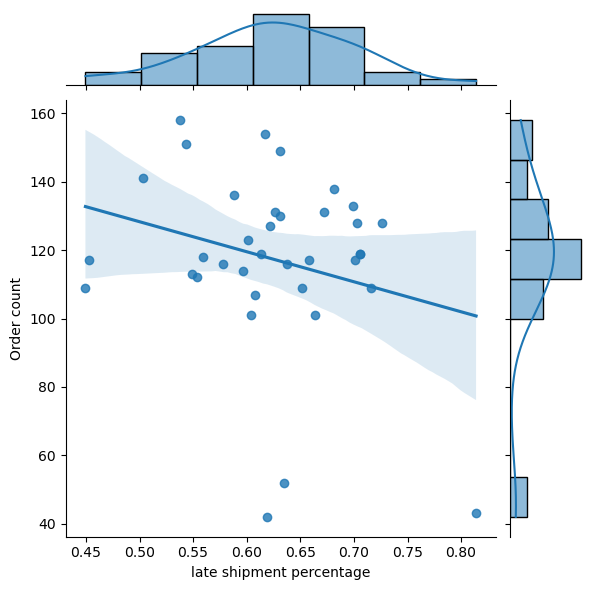

In [411]:
#Correlation between late shipment rate and order quantity of second-class mode
df ["OTSP_dummy"] = np.where(df['OTSP'] < 0 , 1, 0)
df1 = df[(df["modename"] == "Second Class")]
df_lateship = df1.groupby(["orderyear","ordermonth"])["OTSP_dummy"].sum()
df_countord = df1.groupby(["orderyear","ordermonth"])["orderid"].count()

df_corr_OTSP_ordcnt = pd.merge(df_countord, df_lateship, on = ["orderyear","ordermonth"]).rename(columns = {"orderid":"Order count", "OTSP_dummy":"Late shipment count"})
df_corr_OTSP_ordcnt["late shipment percentage"]= df_corr_OTSP_ordcnt["Late shipment count"] / df_corr_OTSP_ordcnt["Order count"]

sns.jointplot(data=df_corr_OTSP_ordcnt, x='late shipment percentage', y='Order count', kind='reg')

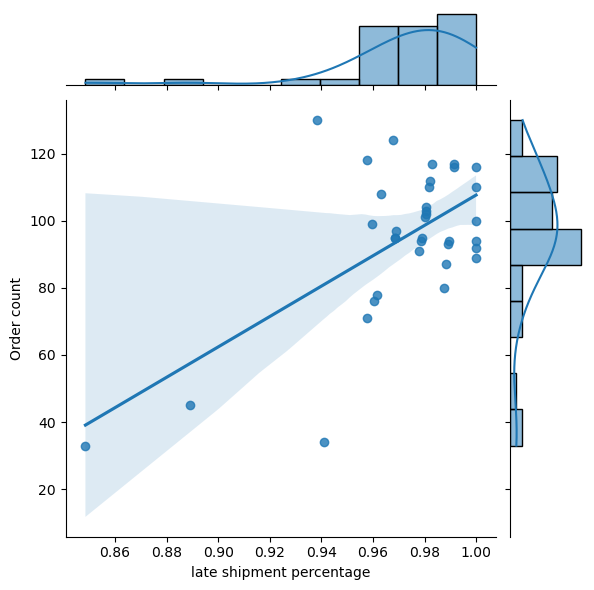

In [413]:
#Correlation between late shipment rate and order quantity of first-class mode
df ["OTSP_dummy"] = np.where(df['OTSP'] < 0 , 1, 0)
df1 = df[(df["modename"] == "First Class")]
df_lateship = df1.groupby(["orderyear","ordermonth"])["OTSP_dummy"].sum()
df_countord = df1.groupby(["orderyear","ordermonth"])["orderid"].count()

df_corr_OTSP_ordcnt = pd.merge(df_countord, df_lateship, on = ["orderyear","ordermonth"]).rename(columns = {"orderid":"Order count", "OTSP_dummy":"Late shipment count"})
df_corr_OTSP_ordcnt["late shipment percentage"]= df_corr_OTSP_ordcnt["Late shipment count"] / df_corr_OTSP_ordcnt["Order count"]

sns.jointplot(data=df_corr_OTSP_ordcnt, x='late shipment percentage', y='Order count', kind='reg')

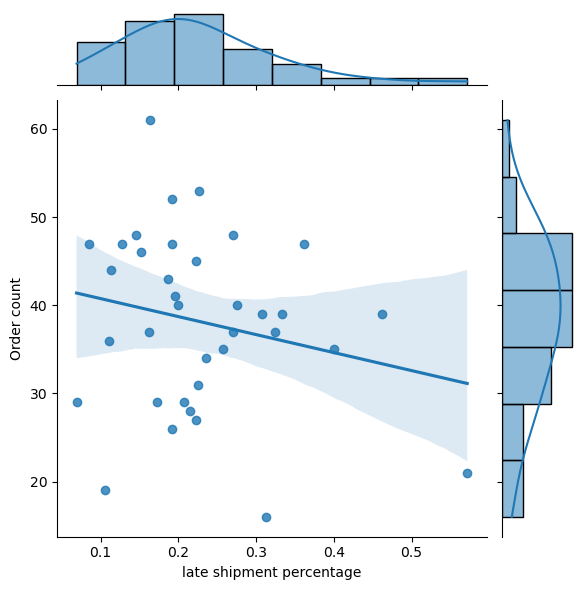

In [419]:
#Correlation between late shipment rate and order quantity of same-day mode
df ["OTSP_dummy"] = np.where(df['OTSP'] < 0 , 1, 0)
df1 = df[(df["modename"] == "Same Day")]
df_lateship = df1.groupby(["orderyear","ordermonth"])["OTSP_dummy"].sum()
df_countord = df1.groupby(["orderyear","ordermonth"])["orderid"].count()

df_corr_OTSP_ordcnt = pd.merge(df_countord, df_lateship, on = ["orderyear","ordermonth"]).rename(columns = {"orderid":"Order count", "OTSP_dummy":"Late shipment count"})
df_corr_OTSP_ordcnt["late shipment percentage"]= df_corr_OTSP_ordcnt["Late shipment count"] / df_corr_OTSP_ordcnt["Order count"]

sns.jointplot(data=df_corr_OTSP_ordcnt, x='late shipment percentage', y='Order count', kind='reg')

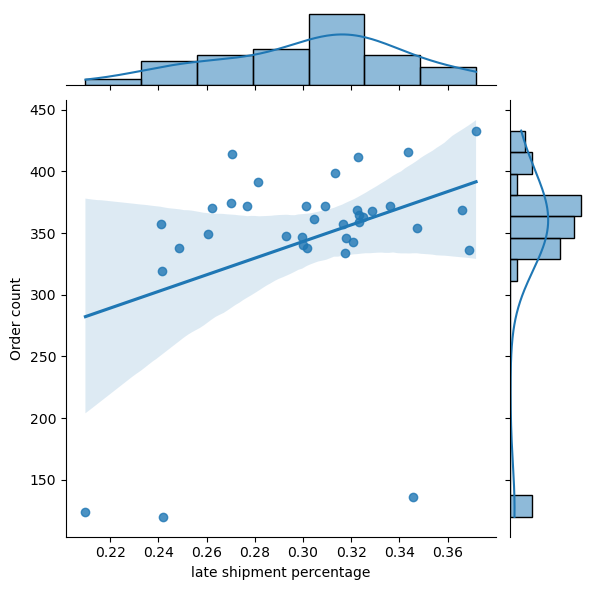

In [421]:
#Correlation between late shipment rate and order quantity of standard-class mode
df ["OTSP_dummy"] = np.where(df['OTSP'] < 0 , 1, 0)
df1 = df[(df["modename"] == "Standard Class")]
df_lateship = df1.groupby(["orderyear","ordermonth"])["OTSP_dummy"].sum()
df_countord = df1.groupby(["orderyear","ordermonth"])["orderid"].count()

df_corr_OTSP_ordcnt = pd.merge(df_countord, df_lateship, on = ["orderyear","ordermonth"]).rename(columns = {"orderid":"Order count", "OTSP_dummy":"Late shipment count"})
df_corr_OTSP_ordcnt["late shipment percentage"]= df_corr_OTSP_ordcnt["Late shipment count"] / df_corr_OTSP_ordcnt["Order count"]

sns.jointplot(data=df_corr_OTSP_ordcnt, x='late shipment percentage', y='Order count', kind='reg')

**Comment:**
* Even though the on-time shipping rate of first-class shipment mode is very low, at 2%, there is no correlation between late shipment and the number of orders. 
* We can clearly see that the higher the late shipment rate in regards of second-class shipment rate, the lower the number of orders being made.
=> Therefore, H2 is **partially accepted** when refers to second-class shipment mode only.

## H3: Suppliers do not provide sufficient products for the company to fulfill the orders

In [451]:
df_ordcnt = df.groupby(["orderyear","ordermonth"])["orderqty"].sum().reset_index().rename(columns = {"orderyear":"year","ordermonth":"month"})
inv_whinv = inv.groupby(["year","month"])["whinv"].sum().reset_index()

ordcnt_whinv = pd.merge(df_ordcnt, inv_whinv, on = ["year","month"])

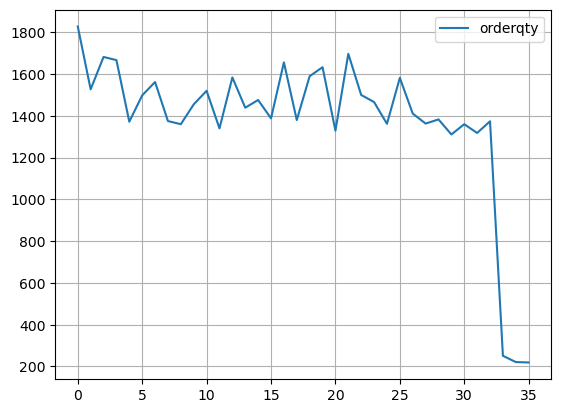

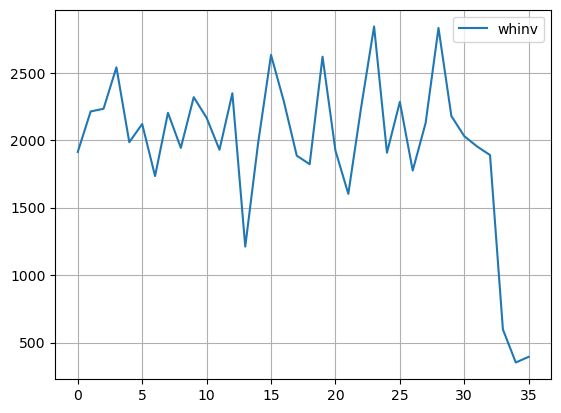

In [453]:
ordcnt_whinv.plot( y = "orderqty", kind = "line", grid = True)
ordcnt_whinv.plot(y = "whinv", kind = "line", grid = True)

plt.legend()
plt.show()

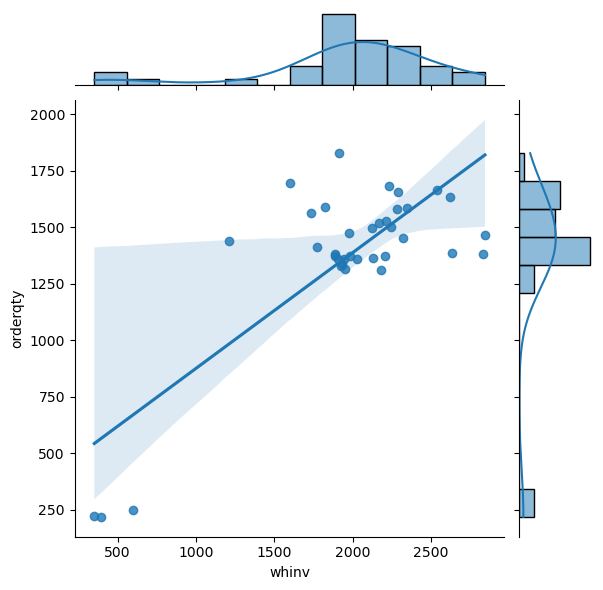

In [455]:
sns.jointplot(data = ordcnt_whinv, x="whinv", y = "orderqty", kind = "reg")

**Coment:**
* There is a positive correlation between warehouse inventory and oder quantity. Also, both exert the same trends from 2015 - 2017.
* We can conclude that our loss of orders is consituted by the insuficiency of product supplies.
=> H3 is **supported**

## H4: Increasing discount rate will generate less profit

In [464]:
df["netsales"] = df["grosssales"]*(1-df["discpc"])
#correlation of discpc and profit margin
df_group_time = df.groupby("discpc")[["profit","netsales"]].sum()
df_profit = df_group_time.reset_index()
df_profit["profitmargin"] = df_profit["profit"]/df_profit["netsales"]

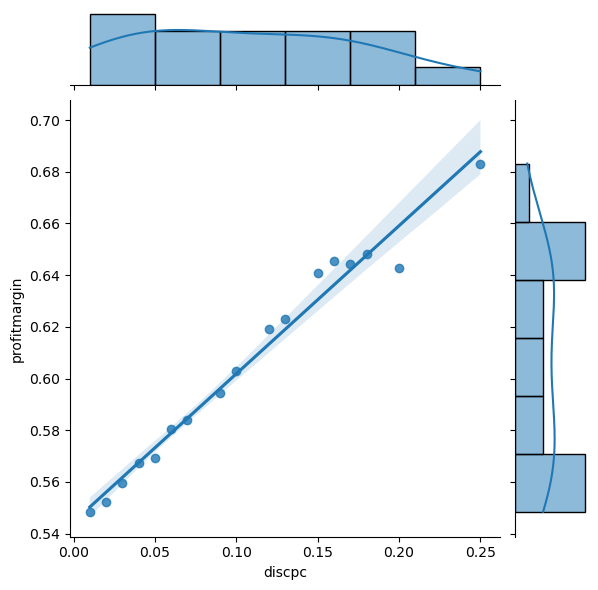

In [466]:
sns.jointplot(data=df_profit, x='discpc', y='profitmargin', kind='reg')

**Comment:**
* As company giving high discount rate for their service, they can generate more profit on each service given. When certain products in the inventory become obsolete or slow-moving, the company can issue high discount rate for these products to enhance their sales volume, thereby increasing the profit.
=> H4 is **not supported.**

## H5: There are products with high-quantity inventory or/and high inventory cost per unit but are not sellable

In [485]:
inv1 = inv["productname"].drop_duplicates().reset_index()
df1 = df.groupby("productname")["orderqty"].sum().reset_index()
orderqty = pd.merge(inv1, df1,left_on=["productname"], right_on=["productname"], how='left')

print("the top 10 products with least order quantity are: ")
orderqty[["productname","orderqty"]].tail(10).reset_index().sort_values("orderqty", ascending = False)

the top 10 products with least order quantity are: 


,index,productname,orderqty
1,109,Titleist Club Glove Travel Cover,5.0
4,112,Diamondback Girls' Clarity 24 Hybrid Bike 201,5.0
0,108,Garmin Forerunner 910XT GPS Watch,4.0
5,113,Stiga Master Series ST3100 Competition Indoor,4.0
3,111,Diamondback Boys' Insight 24 Performance Hybr,3.0
2,110,GoPro HERO3+ Black Edition Camera,2.0
6,114,SOLE E35 Elliptical,NaN
7,115,Bushnell Pro X7 Jolt Slope Rangefinder,NaN
8,116,SOLE E25 Elliptical,NaN
9,117,Bowflex SelectTech 1090 Dumbbells,NaN


<Axes: ylabel='productname'>

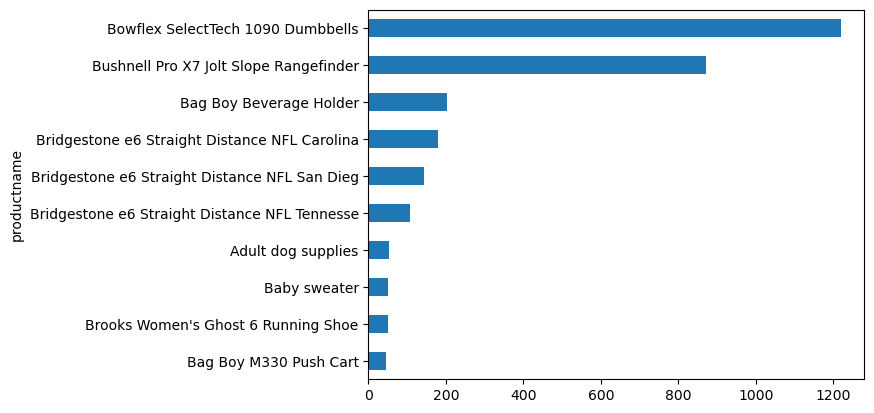

In [487]:
inv["invcost"] = inv["whinv"]*inv["invcostperunit"]
inv_descending = inv.groupby("productname")["invcost"].sum().head(10).sort_values()

inv_descending.plot(kind = "barh")


**Comment:** There are 4 products that are unsellable. More importantly, 2 of them accounts for the majority of inventory costs from 2015 - 2017. => H5 is **accepted**.